<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EC%8B%A4%EC%8A%B5(1)%EA%B5%AC%EA%B0%84%EC%B6%94%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ◆ 점 추정 실습
### 패키지 Import

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# 패키지 임포트
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # FutureWarning 제거

import pandas as pd                 # pandas package
import numpy as np                  # numpy package
import math
from scipy import stats             # Scipy Package

# 시각화 패키지
import matplotlib.pyplot as plt     # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

### 1. 평균의 점 추정

In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import math
# import scipy.stats as st

### 1) 데이터 생성

In [4]:
# 데이터 생성
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25, 101, size=500), columns=["점수"])

### 2) 데이터 탐색

In [5]:
# 요약정보
math_score.describe()

,점수
count,500.000000
mean,61.580000
std,21.513374
min,25.000000
25%,42.000000
50%,62.500000
75%,79.000000
max,100.000000


In [6]:
# 데이터 확인
scores = np.array(math_score['점수'])
scores[:5]

array([33, 49, 92, 73, 35])

In [7]:
# 20개 샘플 추출(복원추출)
sample = np.random.choice(scores, 20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())     # np.std(sample)    # 편향 표본표준편차

[85 91 85 81 64 96 83 68 53 52 61 80 89 32 95 64 81 72 94 92]
75.9
282.29
16.801488029338355


In [8]:
# 표본에 따라 평균 오차 확인
for i in range(10):
    sample1 = np.random.choice(scores, 20)
    print(i+1, "표본평균", sample1.mean())

1 표본평균 67.0
2 표본평균 61.55
3 표본평균 59.55
4 표본평균 62.6
5 표본평균 57.95
6 표본평균 57.8
7 표본평균 59.85
8 표본평균 65.05
9 표본평균 60.0
10 표본평균 63.05


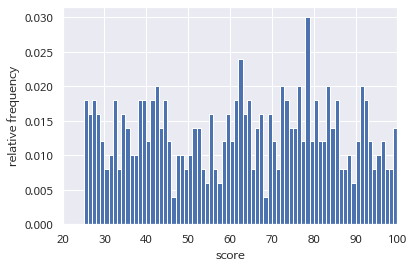

In [9]:
# 모집단 데이터 분포 확인
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.hist(scores, bins=100, range=(0,100), density=True)     # density = True면 상대도수
plt.xlim(20, 100)
plt.show()

In [10]:
# 샘플2 10000개 생성하여 분포 확인
sample_score = np.random.choice(scores, 10000)

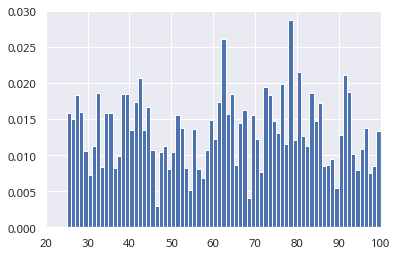

In [11]:
plt.hist(sample_score, bins=100, range=(0,100), density=True)
plt.xlim(20,100)
plt.show()

### 3) 모평균 점 추정

In [12]:
# 20개(n)의 표본 100번 추출
n = 20
nSample = 100

sample_mean = np.array([np.random.choice(scores,n,).mean() for _ in range(nSample)])

In [13]:
# 표본평군 분포 확인
sample_mean

array([63.9 , 62.65, 63.4 , 57.4 , 56.75, 60.35, 55.15, 67.2 , 58.15,
       64.15, 67.7 , 58.45, 58.1 , 60.5 , 58.3 , 63.2 , 65.  , 63.1 ,
       58.75, 70.2 , 61.3 , 60.95, 55.4 , 62.25, 62.7 , 62.8 , 61.05,
       71.3 , 56.8 , 73.4 , 63.  , 63.15, 65.6 , 64.35, 61.55, 74.35,
       51.85, 58.9 , 57.1 , 57.1 , 52.8 , 65.8 , 68.9 , 62.75, 54.4 ,
       57.95, 62.7 , 60.15, 64.15, 61.4 , 71.75, 54.4 , 60.5 , 59.85,
       57.3 , 61.3 , 55.95, 67.45, 62.45, 61.8 , 55.2 , 61.85, 71.1 ,
       62.85, 69.7 , 58.15, 49.75, 58.85, 67.2 , 67.5 , 68.65, 56.1 ,
       62.8 , 58.  , 57.75, 59.2 , 55.35, 67.5 , 56.9 , 59.3 , 67.15,
       50.75, 63.4 , 72.2 , 60.6 , 67.3 , 50.45, 69.55, 69.85, 63.1 ,
       62.1 , 64.8 , 70.7 , 71.25, 58.9 , 63.9 , 62.65, 65.2 , 64.9 ,
       61.  ])

In [14]:
# 모평균
print('모평균 :', scores.mean())

# 표본평균의 평균 <= 모집단을 모를 경우 표본평균이 모수로 추정
print('표본평균의 평균 :', sample_mean.mean())

# 모분산/n
print('모분산/n :', scores.var()/n)

# 표본평균의 분산
print('표본평균의 분산 :', sample_mean.var())

# 표본평균의 편차
print('표본평균의 표준편차 :', sample_mean.std())

# 표준오차 : standard error of the mean
print('표준오차 :', scores.std()/math.sqrt(n))

모평균 : 61.58
표본평균의 평균 : 62.04499999999999
모분산/n : 23.09498
표본평균의 분산 : 28.156875000000003
표본평균의 표준편차 : 5.306305211726895
표준오차 : 4.805723670790903


# ◆ 구간 추정 실습
### 2. 신뢰구간 추정


### 1) 모평균의 신뢰구간 추정
### 샘플 수 < 30, t통계량 이용

In [15]:
from scipy.stats import t
t_95 = t.ppf(1 - (1 - 0.95) / 2, df=20-1)

In [16]:
t_95

2.093024054408263

In [17]:
# 20개(n)의 표본 100개를 추출
# 95% 신뢰구간 추정: t통계량 2.093

sMean = sample_mean.mean()
sStd = sample_mean.std()

Low_c = sMean - t_95*(sStd / math.sqrt(n))
Upper_c = sMean + t_95*(sStd / math.sqrt(n))
print(Low_c)
print(Upper_c)
# 95% 신뢰로 모평균은 59점 ~ 64점 사이에 존재(추정)
print('신뢰구간 :', Upper_c-Low_c)

59.561572716050755
64.52842728394923
신뢰구간 : 4.966854567898473


### 2) 모평균의 신뢰구간 추정
### 샘플 수 >= 30, z통계량 이용

In [18]:
# 30개(n)의 표본 1개를 추출
# 95% 신뢰구간 추정: z통계량 1.96

z_n = 30
sample1 = np.random.choice(scores, z_n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균', scores.mean())
print('표본평균', z_sMean)
print('모편차', scores.std())
print('표본편차', z_sStd)

모평균 61.58
표본평균 58.63333333333333
모편차 21.491849617936563
표본편차 17.85213961655266


In [19]:
# 임계값
z_95 = stats.norm.ppf(1 - (1-0.95)/2)       # 양측검정

# z_95_h = stats.norm.ppf(0.95)             # 단측검정
# print(z_95_h)

In [20]:
L_value_1 = round(z_sMean - z_95 * (scores.std()/math.sqrt(z_n)), 2)
U_value_1 = round(z_sMean + z_95 * (scores.std()/math.sqrt(z_n)), 2)
print(L_value_1)
print(U_value_1)

print('신뢰구간 :', U_value_1-L_value_1)

50.94
66.32
신뢰구간 : 15.379999999999995


### 예제
- 어느 고등학교 남학생 49명의 제자리에서 멀리뛰기 기록은 평균이 205cm, 표준편차가 5cm이었다.
이 학교 남학생들의 제자리 멀리뛰기 기록에 대한 모평균 m의 신뢰도 95% 신뢰구간을 구하라.

In [21]:
# 모평균, 모표준편차, 표본 수
mStd = 5
mMean = 205
n = 49

# z통계량 : 1.96
z_95_1 = stats.norm.ppf(1 - (1-0.95)/2)         # 신뢰구간

# 신뢰구간 계산
L_value = round(mMean - z_95_1*(mStd/math.sqrt(n)),2)
U_value = round(mMean - z_95_1*(mStd/math.sqrt(n)),2)

print('신뢰구간 :', L_value, '~', U_value)
print('신뢰구간 길이 :', U_value - L_value)

print("{} < {} < {}".format(L_value, mMean, U_value))

신뢰구간 : 203.6 ~ 203.6
신뢰구간 길이 : 0.0
203.6 < 205 < 203.6


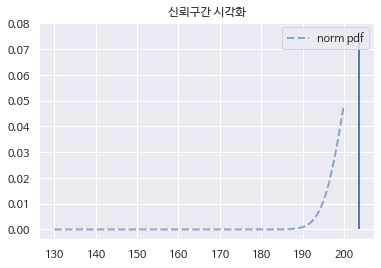

In [22]:
# 시각화
standard_norm = stats.norm(205, 5)

# standard_sr = stats.norm.rcv()
x = np.linspace(130, 200, 100)

plt.vlines(L_value, 0, standard_norm.pdf(L_value), colors="b")
plt.vlines(U_value, 0, standard_norm.pdf(U_value), colors="b")
plt.plot(x, standard_norm.pdf(x), 'b--', lw=2, alpha=0.6, label='norm pdf')

plt.title("신뢰구간 시각화")
plt.legend()
plt.show()